<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session9/S9V6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-c_9xr4gq
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-c_9xr4gq
     |████████████████████████████████| 634kB 18.1MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=b6d70ca8de31b0562c826fd0edd027274c58b3a2379f971314d528c07ddc5875
  Stored in directory: /tmp/pip-ephem-wheel-cache-52z35cp9/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=653a5fac62981435e90f06edc0e0371107a0dd03985071466c779b25893ef854
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
 

In [2]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/API'
sys.path.append(folder)


In [0]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms

In [0]:
import albumentations as A

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
train_transform = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       #A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) # fillvalue is 0 after normalizing as mean is 0
                                       ])
# Test Phase transformations
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])


In [54]:
classes, trainloader, testloader = train_test_loader.load(train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


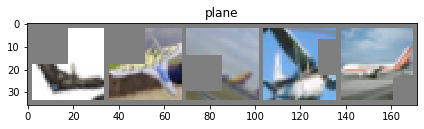

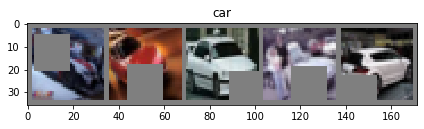

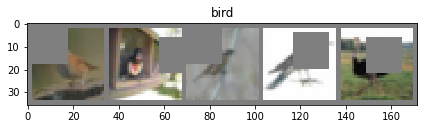

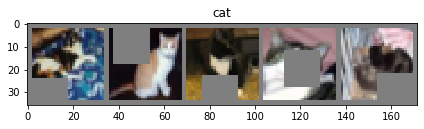

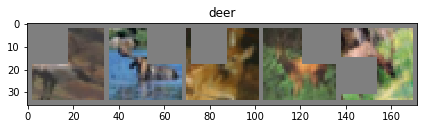

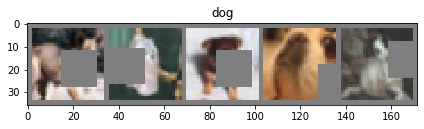

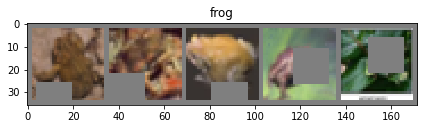

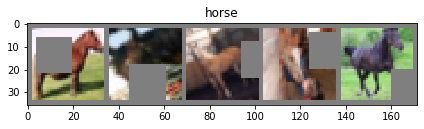

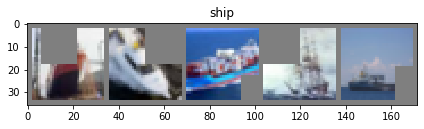

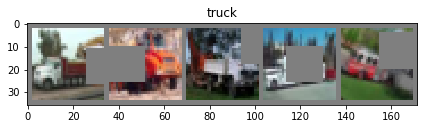

In [55]:
show_images.show_train_data(trainloader, classes)

In [56]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

In [58]:
testLoss = []
testAcc = []
EPOCHS = 30
#best_acc1 = 10
for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     scheduler.step()
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
    #  is_best = test_acc[-1] > best_acc1

    #  best_acc1 = max(test_acc[-1], best_acc1)
    #  save_checkpoint({
    #         'epoch': epoch + 1,
            
    #         'state_dict': model.state_dict(),
    #         'best_acc1': best_acc1,
    #         'optimizer' : optimizer.state_dict(),
    #     }, is_best)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.7093137502670288 Batch_id=390 Accuracy=21.75: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0138, Accuracy: 3268/10000 (32.68%)

EPOCH: 2 LR: 0.1


Loss=1.7477308511734009 Batch_id=390 Accuracy=36.50: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0127, Accuracy: 4099/10000 (40.99%)

EPOCH: 3 LR: 0.1


Loss=1.3613499402999878 Batch_id=390 Accuracy=42.90: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 4897/10000 (48.97%)

EPOCH: 4 LR: 0.1


Loss=1.3361454010009766 Batch_id=390 Accuracy=47.64: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 5500/10000 (55.00%)

EPOCH: 5 LR: 0.1


Loss=1.1313655376434326 Batch_id=390 Accuracy=51.51: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5693/10000 (56.93%)

EPOCH: 6 LR: 0.1


Loss=1.309692144393921 Batch_id=390 Accuracy=54.37: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 5982/10000 (59.82%)

EPOCH: 7 LR: 0.1


Loss=1.1975502967834473 Batch_id=390 Accuracy=57.92: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6370/10000 (63.70%)

EPOCH: 8 LR: 0.1


Loss=1.275189995765686 Batch_id=390 Accuracy=60.09: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 6141/10000 (61.41%)

EPOCH: 9 LR: 0.1


Loss=1.111876130104065 Batch_id=390 Accuracy=61.84: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6863/10000 (68.63%)

EPOCH: 10 LR: 0.1


Loss=1.117499589920044 Batch_id=390 Accuracy=62.91: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 6617/10000 (66.17%)

EPOCH: 11 LR: 0.1


Loss=0.9132493734359741 Batch_id=390 Accuracy=64.39: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 6552/10000 (65.52%)

EPOCH: 12 LR: 0.1


Loss=1.0097600221633911 Batch_id=390 Accuracy=65.72: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 6949/10000 (69.49%)

EPOCH: 13 LR: 0.1


Loss=0.9895094633102417 Batch_id=390 Accuracy=66.62: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6778/10000 (67.78%)

EPOCH: 14 LR: 0.1


Loss=1.16392982006073 Batch_id=390 Accuracy=67.63: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6841/10000 (68.41%)

EPOCH: 15 LR: 0.1


Loss=0.7758361101150513 Batch_id=390 Accuracy=68.14: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7346/10000 (73.46%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.6424587368965149 Batch_id=390 Accuracy=74.32: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8194/10000 (81.94%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.5529464483261108 Batch_id=390 Accuracy=76.67: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8307/10000 (83.07%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.7053391933441162 Batch_id=390 Accuracy=77.32: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8308/10000 (83.08%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.6459614038467407 Batch_id=390 Accuracy=78.13: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8402/10000 (84.02%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.6363340616226196 Batch_id=390 Accuracy=78.43: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8424/10000 (84.24%)

EPOCH: 21 LR: 0.010000000000000002


Loss=0.7948625683784485 Batch_id=390 Accuracy=78.78: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8382/10000 (83.82%)

EPOCH: 22 LR: 0.010000000000000002


Loss=0.7136414051055908 Batch_id=390 Accuracy=79.22: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8402/10000 (84.02%)

EPOCH: 23 LR: 0.010000000000000002


Loss=0.7004126310348511 Batch_id=390 Accuracy=79.64: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8512/10000 (85.12%)

EPOCH: 24 LR: 0.010000000000000002


Loss=0.6348466873168945 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8531/10000 (85.31%)

EPOCH: 25 LR: 0.010000000000000002


Loss=0.45789599418640137 Batch_id=390 Accuracy=80.53: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8530/10000 (85.30%)

EPOCH: 26 LR: 0.010000000000000002


Loss=0.41257238388061523 Batch_id=390 Accuracy=80.90: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8558/10000 (85.58%)

EPOCH: 27 LR: 0.010000000000000002


Loss=0.5538035035133362 Batch_id=390 Accuracy=80.80: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8553/10000 (85.53%)

EPOCH: 28 LR: 0.010000000000000002


Loss=0.49756374955177307 Batch_id=390 Accuracy=81.26: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8492/10000 (84.92%)

EPOCH: 29 LR: 0.010000000000000002


Loss=0.40381962060928345 Batch_id=390 Accuracy=81.16: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8572/10000 (85.72%)

EPOCH: 30 LR: 0.010000000000000002


Loss=0.6226808428764343 Batch_id=390 Accuracy=81.67: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]



Test set: Average loss: 0.0031, Accuracy: 8675/10000 (86.75%)



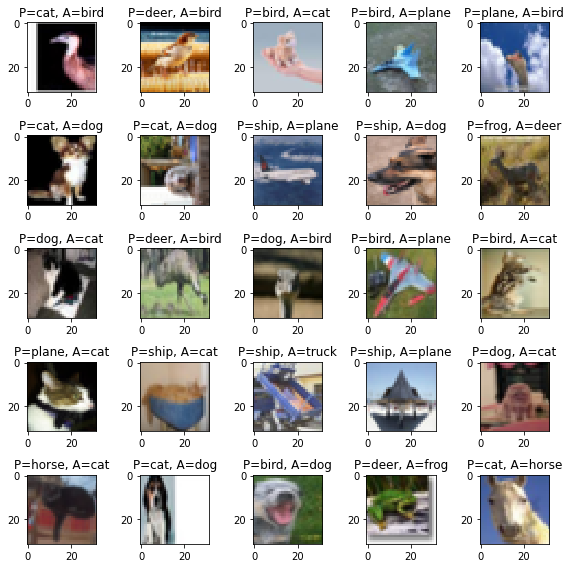

In [59]:
evaluate.show_misclassified_images(model, device, testloader, classes)

In [60]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 86 %


In [61]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 84 %
Accuracy of   car : 95 %
Accuracy of  bird : 80 %
Accuracy of   cat : 70 %
Accuracy of  deer : 85 %
Accuracy of   dog : 79 %
Accuracy of  frog : 90 %
Accuracy of horse : 91 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %


Text(0.5, 1.0, 'Test Accuracy')

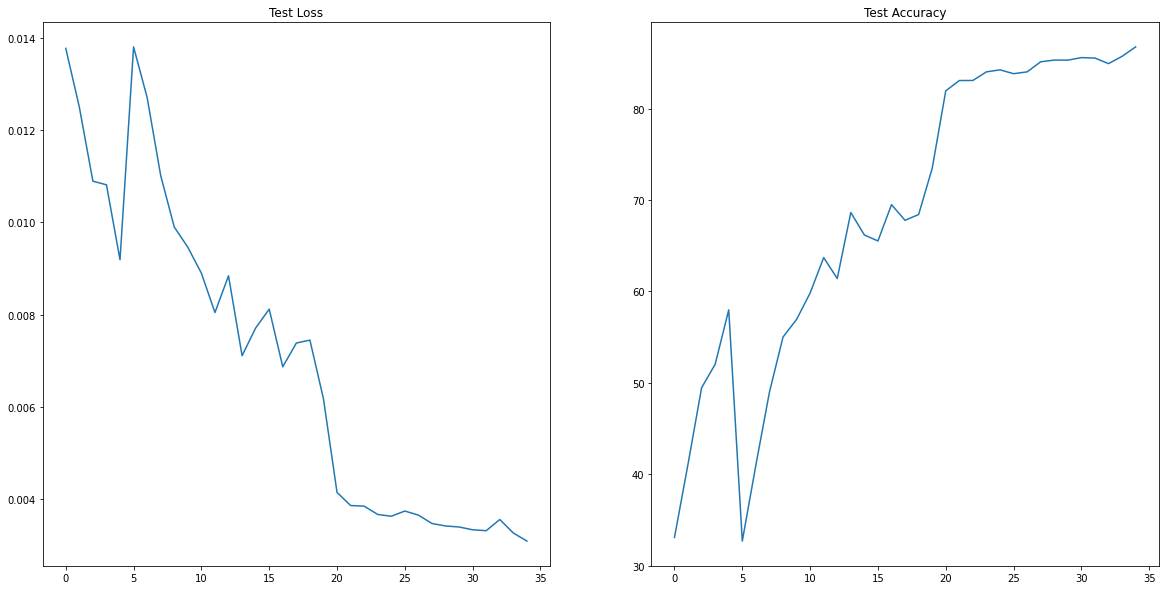

In [62]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")



In [0]:
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

In [0]:
import shutil

In [0]:
import torch.nn.functional as F
class GradCAM:
    """Calculate GradCAM salinecy map.
    Args:
        input: input image with shape of (1, 3, H, W)
        class_idx (int): class index for calculating GradCAM.
                If not specified, the class index that makes the highest model prediction score will be used.
    Return:
        mask: saliency map of the same spatial dimension with input
        logit: model output
    A simple example:
        # initialize a model, model_dict and gradcam
        resnet = torchvision.models.resnet101(pretrained=True)
        resnet.eval()
        gradcam = GradCAM.from_config(model_type='resnet', arch=resnet, layer_name='layer4')
        # get an image and normalize with mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
        img = load_img()
        normed_img = normalizer(img)
        # get a GradCAM saliency map on the class index 10.
        mask, logit = gradcam(normed_img, class_idx=10)
        # make heatmap from mask and synthesize saliency map using heatmap and img
        heatmap, cam_result = visualize_cam(mask, img)
    """

    def __init__(self, model, layer_name):
        self.model = model
        # self.layer_name = layer_name
        self.target_layer = layer_name

        self.gradients = dict()
        self.activations = dict()

        def backward_hook(module, grad_input, grad_output):
            self.gradients['value'] = grad_output[0]

        def forward_hook(module, input, output):
            self.activations['value'] = output

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    @classmethod
    def from_config(cls, arch: torch.nn.Module, model_type: str, layer_name: str):
        target_layer = layer_finders[model_type](arch, layer_name)
        return cls(arch, target_layer)

    def saliency_map_size(self, *input_size):
        device = next(self.model_arch.parameters()).device
        self.model(torch.zeros(1, 3, *input_size, device=device))
        return self.activations['value'].shape[2:]

    def forward(self, input, class_idx=None, retain_graph=False):
        b, c, h, w = input.size()

        logit = self.model(input)
        if class_idx is None:
            score = logit[:, logit.max(1)[-1]].squeeze()
        else:
            score = logit[:, class_idx].squeeze()

        self.model.zero_grad()
        score.backward(retain_graph=retain_graph)
        gradients = self.gradients['value']
        activations = self.activations['value']
        b, k, u, v = gradients.size()

        alpha = gradients.view(b, k, -1).mean(2)
        # alpha = F.relu(gradients.view(b, k, -1)).mean(2)
        weights = alpha.view(b, k, 1, 1)

        saliency_map = (weights*activations).sum(1, keepdim=True)
        saliency_map = F.relu(saliency_map)
        saliency_map = F.upsample(saliency_map, size=(h, w), mode='bilinear', align_corners=False)
        saliency_map_min, saliency_map_max = saliency_map.min(), saliency_map.max()
        saliency_map = (saliency_map - saliency_map_min).div(saliency_map_max - saliency_map_min).data
        
        self.gradients.clear()
        self.activations.clear()
        return saliency_map, logit

    def __call__(self, input, class_idx=None, retain_graph=False):
        return self.forward(input, class_idx, retain_graph)

In [0]:
import cv2
def visualize_cam(mask, img, alpha=1.0):
    """Make heatmap from mask and synthesize GradCAM result image using heatmap and img.
    Args:
        mask (torch.tensor): mask shape of (1, 1, H, W) and each element has value in range [0, 1]
        img (torch.tensor): img shape of (1, 3, H, W) and each pixel value is in range [0, 1]
    Return:
        heatmap (torch.tensor): heatmap img shape of (3, H, W)
        result (torch.tensor): synthesized GradCAM result of same shape with heatmap.
    """
    heatmap = (255 * mask.squeeze()).type(torch.uint8).cpu().numpy()
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = torch.from_numpy(heatmap).permute(2, 0, 1).float().div(255)
    b, g, r = heatmap.split(1)
    heatmap = torch.cat([r, g, b]) * alpha

    result = heatmap+img.cpu()
    result = result.div(result.max()).squeeze()

    return heatmap, result

In [0]:
import PIL
img_name =[sys.path[-1]+'/cat.jpeg',sys.path[-1]+'/dog.jpeg',sys.path[-1]+'/bird.jpeg',sys.path[-1]+'/truck.jpeg',sys.path[-1]+'/car.jpeg']

pil_image = []
for i,img in enumerate(img_name):
   pil_image.append(PIL.Image.open(img))

In [0]:
from torchvision import transforms
normed_torch_img = []
torch_img_list = []

for i in pil_image:
  torch_img = transforms.Compose([
      transforms.Resize((32, 32)),
      transforms.ToTensor()
  ])(i).to(device)
  torch_img_list.append(torch_img)

  normed_torch_img .append(transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])(torch_img)[None])

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img ):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


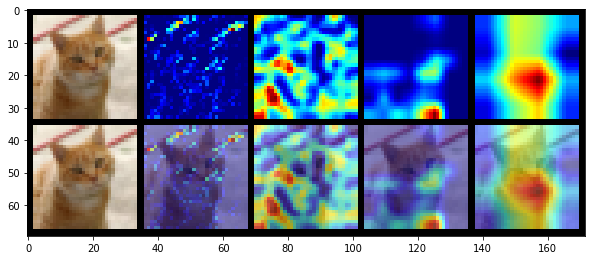

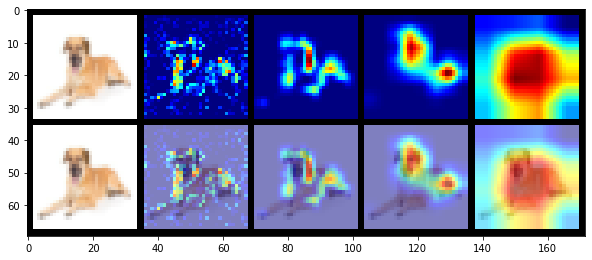

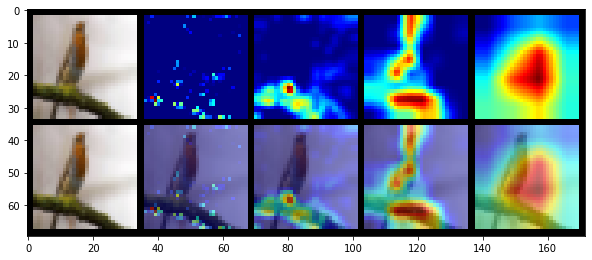

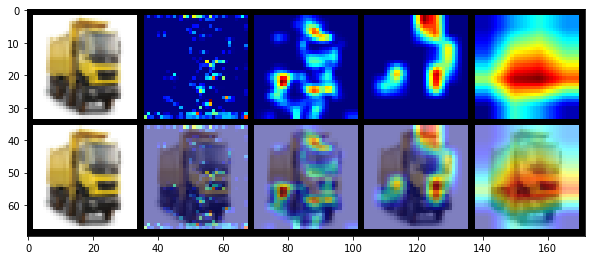

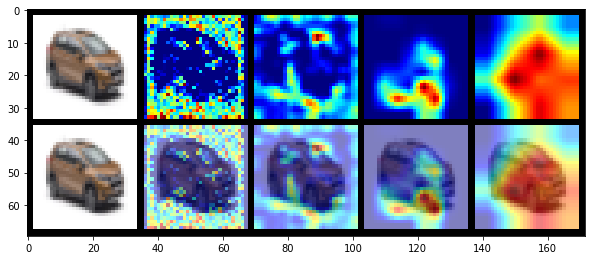

In [68]:
import copy
from torchvision.utils import make_grid, save_image
#import model
for i,k in enumerate(normed_torch_img):
  images1 = [torch_img_list[i].cpu()]
  images2 =  [torch_img_list[i].cpu()]
  b = copy.deepcopy(model.to(device))
  layers =  [b.layer1,b.layer2,b.layer3,b.layer4]
  for j in layers:
    g = GradCAM(b,j)
    mask, _= g(normed_torch_img[i])
    heatmap, result = visualize_cam(mask,torch_img_list[i] )
    images1.extend([heatmap])
    images2.extend([result])
  grid_image = make_grid(images1+images2, nrow=5)
  imshow(grid_image)
  